# CS573: Optimization Methods
## Assignment 1
### Vasileios Papageridis - csd4710

---

#### Exercise 2: Interpretation and Reduction of the MovieLens Dataset Using SVD and PCA

---

##### Overview

In this exercise, we explore the MovieLens dataset through Singular Value Decomposition (SVD) and Principal Component Analysis (PCA) techniques. The goal is to interpret and reduce the dimensionality of the dataset for further analysis.

## 2.2 Data Exploration
In this section we will explore the MovieLens dataset and try to understand the data we are working with. This stage is important because it will set the stage for the rest of the analysis.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Number of users:  610
Number of movies:  9724
Number of ratings:  100836
Mean rating:  3.5


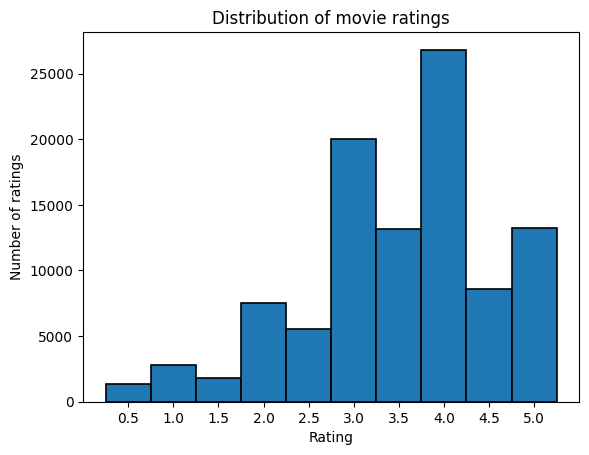

In [3]:
path = os.getcwd() + '/ml-latest-small/ratings.csv'
data = pd.read_csv('ml-latest-small/ratings.csv', header=0, names=['userId', 'movieId', 'rating', 'timestamp'])

# (a) Calculate the number of users, movies and ratings in the dataset.
print('Number of users: ', len(data.userId.unique()))
print('Number of movies: ', len(data.movieId.unique()))
print('Number of ratings: ', len(data))
print('Mean rating: ', data.rating.median())

# (b) Visualize the distribution of movie ratings.
edges = np.arange(0.25, 5.75, 0.5)
plt.hist(data.rating, bins=edges, edgecolor='black', linewidth=1.2)
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.title('Distribution of movie ratings')
plt.show()

### Analysis of Movie Ratings Distribution

### Summary Statistics:
- Number of users: 610
- Number of movies: 9724
- Number of ratings: 100836
- Mean rating: 3.5

As we can observe from the plot, viewers are generally generous in their ratings of movies. The median rating is 3.5 on a scale from 1 to 5. The distribution of ratings is also skewed to the left, with a long tail on the left side. This means that there are a few movies that are rated very poorly, but most movies are rated well.

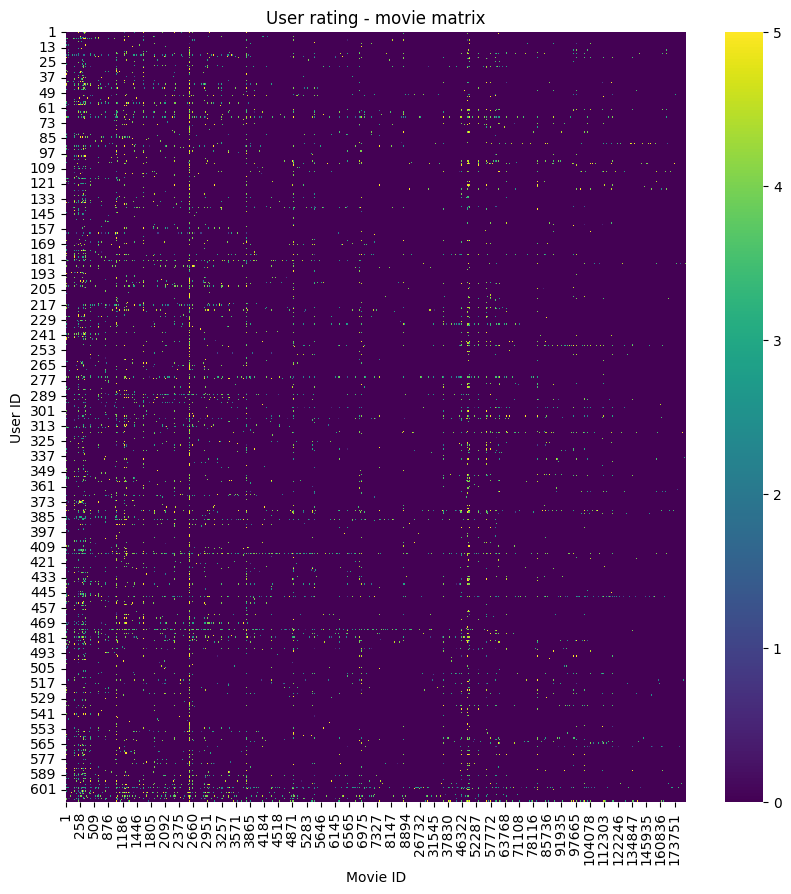

In [4]:
# (d) Generate the user rating - movie matrix from the data
user_movie_matrix = data.pivot(index='userId', columns='movieId', values='rating')
user_movie_matrix = user_movie_matrix.fillna(0)

# (c), (e) Identify and visualize any missing ratings to understand data completeness.
plt.figure(figsize=(10, 10))
sns.heatmap(user_movie_matrix, cmap='viridis')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.title('User rating - movie matrix')
plt.show()

### Identifying the gaps in the data
From the heatmap, we observe that gaps in the data are prevalent. Not all users have rated all movies, leading to a sparse matrix. The data sparsity indicates that many movies have not been rated by any user. This common occurrence highlights the incomplete nature of the dataset.

### 2.3 Data interpretation using SVD

In the following cell we make an implementation of the SVD algorithm. We will use this implementation to interpret the data and reduce its dimensionality. At all cases we will compare the results with the results of the SVD implementation of the numpy library.

The `custom_svd` function performs Singular Value Decomposition (SVD) on a given matrix. Here's a step-by-step explanation of what the function does:

1. **Covariance Matrix Calculation**: The function first checks the shape of the input matrix.
<br>If the number of rows is greater than or equal to the number of columns, it calculates the covariance matrix as the dot product of the transpose of the matrix and the matrix itself $A^T \cdot A$.<br>
Otherwise, it calculates the covariance matrix as the dot product of the matrix and its transpose $A \cdot A^T$ (this matrix also referred as "Gram" matrix).

2. **Eigenvalue and Eigenvector Calculation**: The function then calculates the eigenvalues and eigenvectors of the covariance matrix using the `numpy.linalg.eigh` function.

3. **Sorting Eigenvalues and Eigenvectors**: The eigenvalues and corresponding eigenvectors are sorted in descending order. This is done because the eigenvalues represent the variance of the data along the new feature axes, and we want to keep the features with the highest variance first.

4. **Singular Value and U Matrix Calculation**: The singular values are calculated as the square root of the eigenvalues. The matrix $U$ is set to the sorted eigenvectors.

5. **Vt Matrix Calculation**: The transpose of the right singular vectors $Vt$ is calculated differently based on the shape of the input matrix.<br>
If the number of rows is greater than or equal to the number of columns, $V$ is calculated as the dot product of the inverse of the diagonal matrix of singular values and the dot product of the transpose of $U$ and the transpose of the matrix.<br>
Otherwise, $V$ is calculated as the dot product of the transpose of the matrix and the dot product of $U$ and the inverse of the diagonal matrix of singular values. Vt is then set to the transpose of V.

6. **Return Values**: The function returns the $U$ matrix, the singular values, and the Vt matrix. These are the three matrices that make up the singular value decomposition of the input matrix.

In [5]:
def custom_svd(matrix):
    """
    Perform Singular Value Decomposition (SVD) on the given matrix.

    Parameters:
    - matrix: The input matrix to decompose.

    Returns:
    - U: The left singular vectors.
    - S: The singular values.
    - Vt: The transpose of the right singular vectors.
    """
    # Calculate the covariance matrix
    if matrix.shape[0] >= matrix.shape[1]:
        covariance_matrix = np.dot(matrix.T, matrix)
    else:
        covariance_matrix = np.dot(matrix, matrix.T)    # actually gram matrix

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Calculate the singular values and U matrix
    singular_values = np.sqrt(eigenvalues)
    U = eigenvectors

    # Calculate the V matrix
    if matrix.shape[0] >= matrix.shape[1]:
        V = np.dot(np.linalg.inv(np.diag(singular_values)), np.dot(U.T, matrix.T))
    else:
        V = np.dot(matrix.T, np.dot(U, np.linalg.inv(np.diag(singular_values))))

    Vt = V.T

    return U, singular_values, Vt

In [6]:
# (a) Use the custom SVD function to decompose the user-movie matrix
U, S, Vt = custom_svd(user_movie_matrix)

In [7]:
# Use the SVD from numpy to check the results
U2, S2, Vt2 = np.linalg.svd(user_movie_matrix, full_matrices=False)

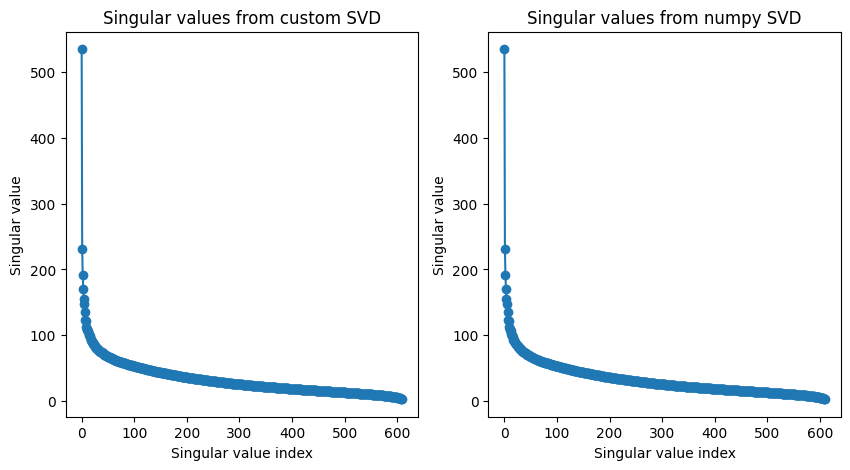

In [7]:
# (b) plot the singular values for both SVDs in subplots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(S, 'o-')
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular values from custom SVD')
plt.subplot(1, 2, 2)
plt.plot(S2,  'o-')
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular values from numpy SVD')
plt.show()

### Information Captured by Singular Values

In the Singular Value Decomposition (SVD) of the user-ratings matrix, we obtain singular values that provide essential information about the data. The plot above illustrates the magnitudes of these singular values.

<br>

Singular values represent the importance of the corresponding singular vectors in the decomposition.
<br>

The higher the magnitude of a singular value, the more significant its associated singular vector is in capturing the variance within the data.

Singular values help in determining the intrinsic dimensionality of the user-ratings matrix.
<br>

In the context of recommendation systems like MovieLens, singular values and vectors play a role in identifying latent features that characterize users and movies.


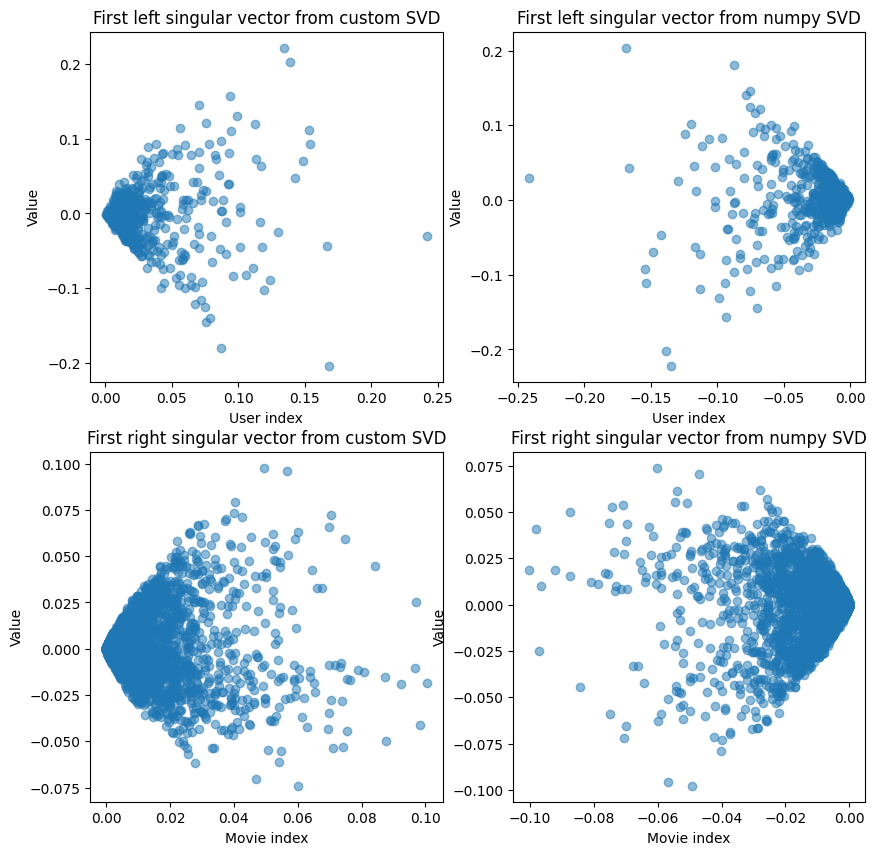

In [8]:
# (c) Examine the left singular vectors (related to users) and the right singular vectors (associated with movies).
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(U[:, 0], U[:, 1], 'o', alpha=0.5)
plt.xlabel('User index')
plt.ylabel('Value')
plt.title('First left singular vector from custom SVD')
plt.subplot(2, 2, 2)
plt.plot(U2[:, 0], U2[:, 1], 'o', alpha=0.5)
plt.xlabel('User index')
plt.ylabel('Value')
plt.title('First left singular vector from numpy SVD')
plt.subplot(2, 2, 3)
plt.plot(Vt[0, :], Vt[1, :], 'o', alpha=0.5)
plt.xlabel('Movie index')
plt.ylabel('Value')
plt.title('First right singular vector from custom SVD')
plt.subplot(2, 2, 4)
plt.plot(Vt2[0, :], Vt2[1, :], 'o', alpha=0.5)
plt.xlabel('Movie index')
plt.ylabel('Value')
plt.title('First right singular vector from numpy SVD')
plt.show()


### Analysis:

Upon examining the left singular vectors associated with users and the right singular vectors associated with movies, several observations can be made:

- **User Preferences:**
  - Clusters or patterns in the left singular vectors indicate groups of users with similar rating behaviors.
  - Commonalities in the vectors might suggest shared preferences among certain user segments.
<br>
- **Movie Genres:**
  - Patterns in the right singular vectors reflect similarities in movies based on user ratings.
  - Clusters might represent genres or characteristics that appeal to specific groups of users.

**Insights:**
- The presence of distinct clusters could imply the existence of latent features or genres in the dataset.
- Patterns in user-related vectors may uncover segments of users with similar tastes.
- Movie-related vectors may highlight common characteristics shared among certain groups of movies.


### Impact of Missing Values in Performance and Replacement with Zeros

Missing values have a significant impact on performance by increasing the sparsity of the matrix. This sparsity introduces more gaps in the data, making it difficult to identify meaningful patterns.

Replacing `NaN` values with zeros, while reducing sparsity, comes with certain trade-offs:

1. **Matrix Density:**
   - The matrix becomes denser as missing values are replaced with zeros, making it less sparse.
   - Reduced sparsity facilitates pattern recognition, as there are fewer gaps in the data.

2. **Accuracy Concerns:**
   - While increased density aids in pattern identification, replacing missing values with zeros may compromise data accuracy.

3. **Impact on Singular Values:**
   - The singular values of the modified matrix may decrease in magnitude.
   - Smaller singular values suggest that the replaced zeros contribute less to capturing the variability in the data.

### 2.4 Reducing Complexity with PCA

In this section we will use PCA to reduce the dimensionality of the data. We will implement PCA from scratch and compare it to the PCA implementation from sklearn.


In [8]:
def custom_PCA(data, num_components=None):
    """
    Perform Principal Component Analysis (PCA) on the given data.

    Parameters:
    - data: The input data matrix with samples in rows and features in columns.
    - num_components: The number of principal components to retain. If None, all components are retained.

    Returns:
    - components: The principal components.
    - explained_variance: The explained variance of each principal component.
    - mean: The mean of the input data.
    """
    # Calculate the mean of the data
    mean = np.mean(data, axis=0)

    # Center the data by subtracting the mean
    centered_data = data - mean

    # Calculate the Gram matrix
    gram_matrix = np.dot(centered_data, centered_data.T) / (centered_data.shape[1] - 1)

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(gram_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Replace negative eigenvalues with a small positive number
    eigenvalues = np.where(eigenvalues < 0, np.finfo(float).eps, eigenvalues)

    # Continue with the rest of the code...
    eigenvectors = np.dot(centered_data.T, eigenvectors) / (np.sqrt(eigenvalues * (centered_data.shape[1] - 1)))
    
    # Retain only the specified number of principal components
    if num_components is not None:
        components = eigenvectors[:, :num_components]
        explained_variance = eigenvalues[:num_components] / np.sum(eigenvalues)
    else:
        components = eigenvectors
        explained_variance = eigenvalues / np.sum(eigenvalues)

    return components, explained_variance, mean

In [9]:
# Use custom PCA to calculate the first 3 principal components
components, explained_variance, mean = custom_PCA(user_movie_matrix, 3)

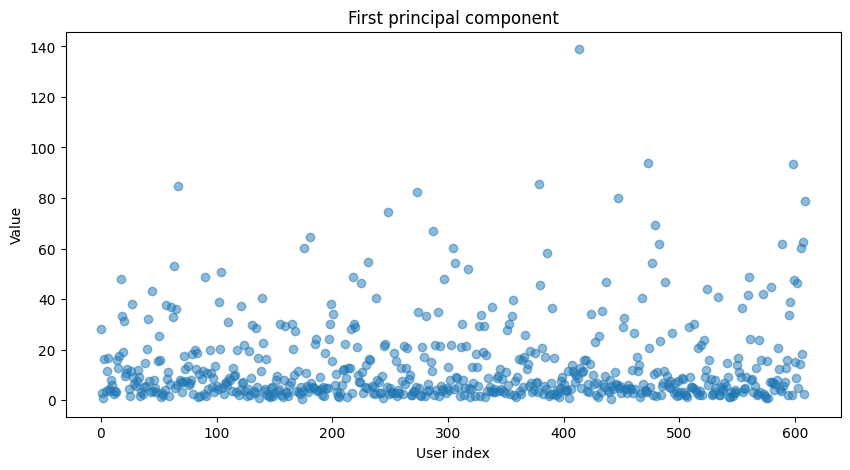

In [12]:
# (b) Project the data onto the first principal component
projected_data = np.dot(user_movie_matrix, components[:, 0])

# Plot the projected data
plt.figure(figsize=(10, 5))
plt.plot(projected_data, 'o', alpha=0.5)
plt.xlabel('User index')
plt.ylabel('Value')
plt.title('First principal component')
plt.show()

In [10]:
# Use sklearn PCA to calculate the first 3 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(user_movie_matrix)

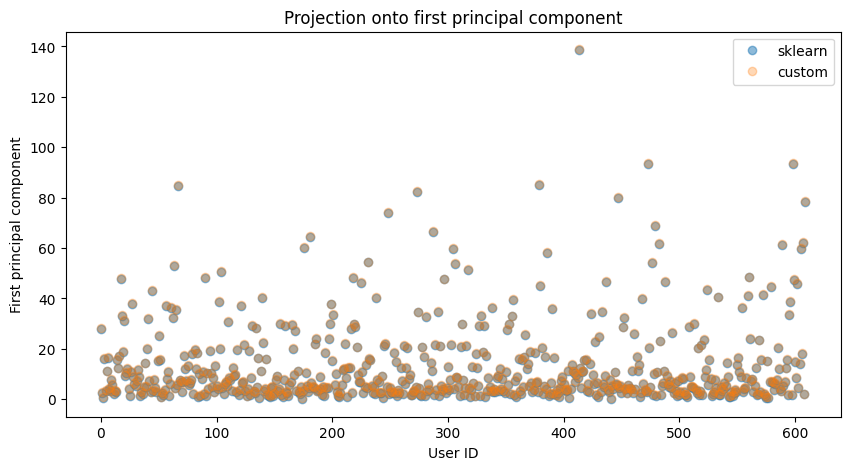

In [14]:
# Plot the projected data for both custom and sklearn PCA
plt.figure(figsize=(10, 5))
plt.plot(X_pca[:, 0] - X_pca[:, 0].min(), 'o', alpha=0.5, label='sklearn')
plt.plot(projected_data, 'o', alpha=0.3, label='custom')
plt.xlabel('User ID')
plt.ylabel('First principal component')
plt.title('Projection onto first principal component')
plt.legend()
plt.show()

### Information given by projection onto first principal component
When we project the data onto the first principal component using PCA for dimensionality reduction, the information provided is centered around capturing the maximum variance in the dataset along a single axis. The first principal component represents the direction in the feature space along which the data varies the most.
<br>
This projection onto the first principal component serves as a concise representation of the data, emphasizing the most critical direction of variability and facilitating dimensionality reduction for further analysis.


### Projecting the Data onto the First Two Principal Components

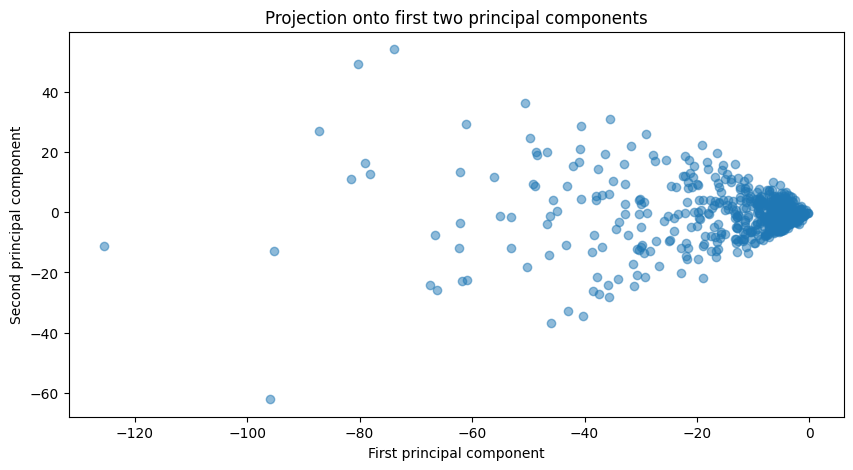

In [122]:
# (c) Projecting the data onto the first two and then the first three principal components.
projected_data2 = np.dot(user_movie_matrix, components[:, :2])
projected_data3 = np.dot(user_movie_matrix, components[:, :3])

# Projecting the data onto the first two principal components
plt.figure(figsize=(10, 5))
plt.plot(projected_data2[:, 0], projected_data2[:, 1], 'o', alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Projection onto first two principal components')
plt.show()

### Projecting onto the First Two Principal Components

The scatter plot illustrates the projection of the data onto the first two principal components. This projection provides a compressed representation of the data, emphasizing the most significant sources of variability.

- **Patterns and Clusters:**
  - We can clearly see the presence of clusters in the scatter plot.
  - Clusters may suggest inherent structures in the data, providing insights into user preferences or movie characteristics.

### Projecting the Data onto the First Three Principal Components

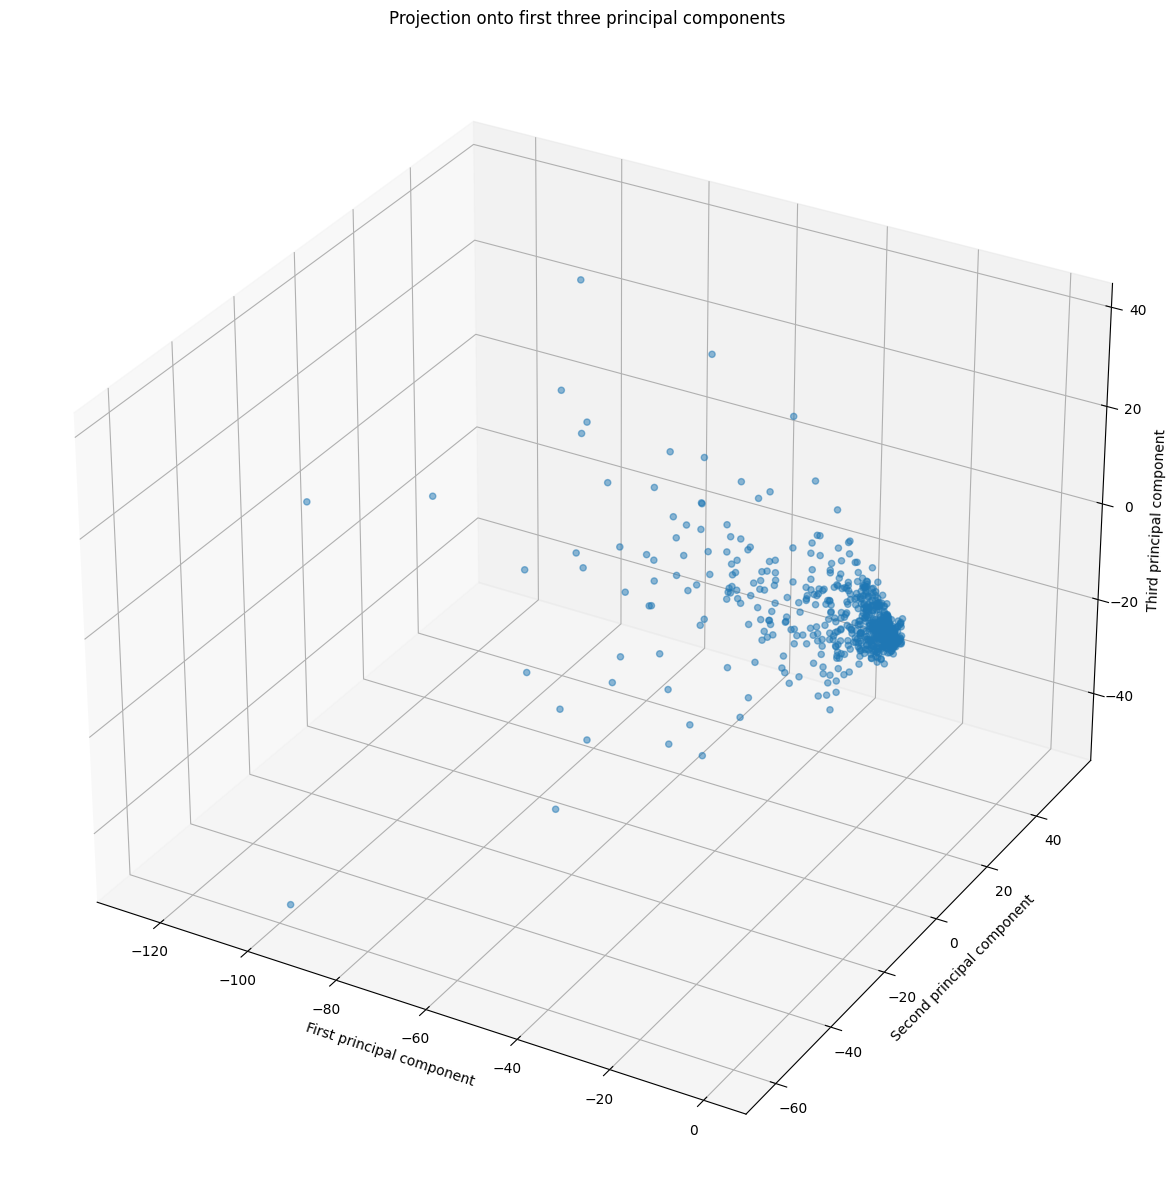

In [124]:
# Projecting the data onto the first three principal components
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_data3[:, 0], projected_data3[:, 1], projected_data3[:, 2], 'o', alpha=0.5)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')
ax.set_title('Projection onto first three principal components')
plt.show()

### Projecting onto the First Three Principal Components

The 3D scatter plot extends the analysis to the first three principal components. This visualization allows for a more comprehensive exploration of the data, capturing additional dimensions of variability.

- **Patterns and Clusters:**
  - As before we can observe the presence of clusters in the scatter plot.
  - Three-dimensional clusters reveal more nuanced relationships within the data.

### 3 User Similarity via PCA Projections

<b>Objective</b>: To apply PCA on a subset of users, then validate the derived<br>
low-dimensional space using a different set of users, and find the nearest neighbors
in this reduced dimensionality.

In the last section we will use PCA to find similar users. We will use the PCA projections to find similar users. We will also use the PCA projections to find similar movies.

Number of users in training set:  427
Number of users in validation set:  183


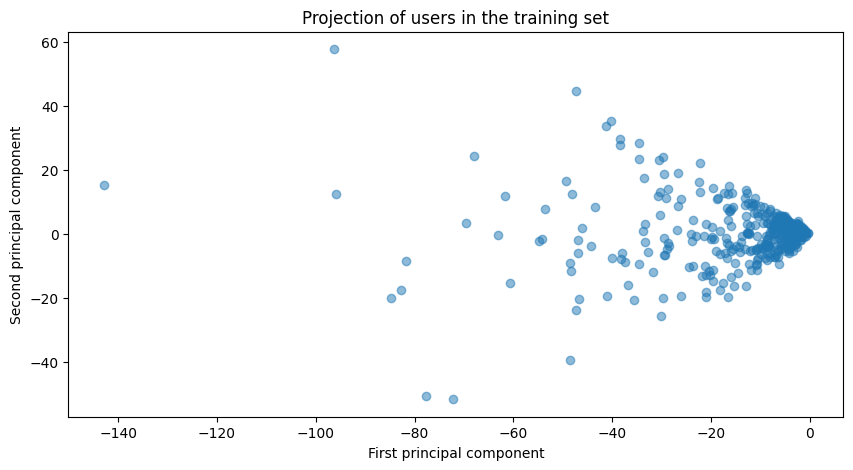

In [142]:
from sklearn.model_selection import train_test_split

# A. Train-Validation Split:
# 1. Randomly selecting a subset of users (70% of total users) as our training set. 
# The remaining users will be used for validation.

X_train, X_validation = train_test_split(user_movie_matrix, test_size=0.3)

print('Number of users in training set: ', len(X_train))
print('Number of users in validation set: ', len(X_validation))

# B. PCA on training set:
components, explained_variance, mean = custom_PCA(X_train, 3)
projection = np.dot(X_train, components)

# Plot the projected users in the low-dimensional space
plt.figure(figsize=(10, 5))
plt.plot(projection[:, 0], projection[:, 1], 'o', alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Projection of users in the training set')
plt.show()

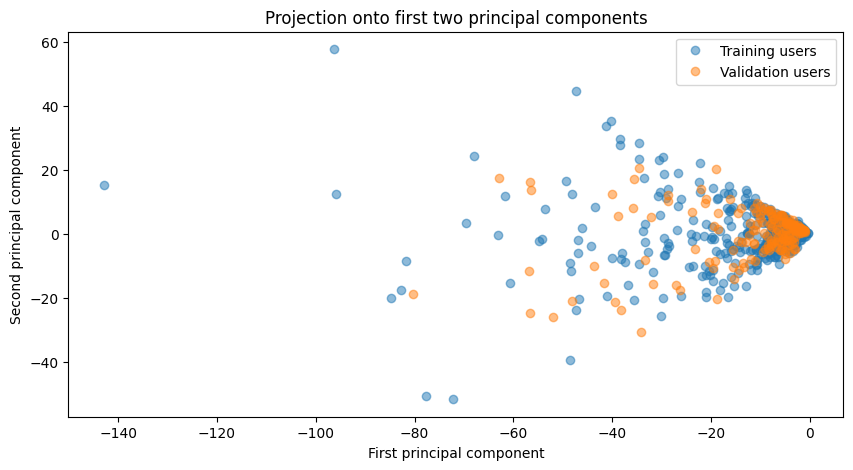

In [143]:
# C. Projecting validation users:
validation_proj = np.dot(X_validation, components)

# Plot the projected users in the low dimensional space on the same plot as the training users
plt.figure(figsize=(10, 5))
plt.plot(projection[:, 0], projection[:, 1], 'o', alpha=0.5)
plt.plot(validation_proj[:, 0], validation_proj[:, 1], 'o', alpha=0.5)
plt.legend(['Training users', 'Validation users'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Projection onto first two principal components')
plt.show()

Similarity score between validation user and neighbor 222.0 :  1.0
Similarity score between validation user and neighbor 264.0 :  0.23142268053409296
Similarity score between validation user and neighbor 289.0 :  0.7882634225314344
Similarity score between validation user and neighbor 316.0 :  0.7202953816721467
Similarity score between validation user and neighbor 286.0 :  0.1483979123088849


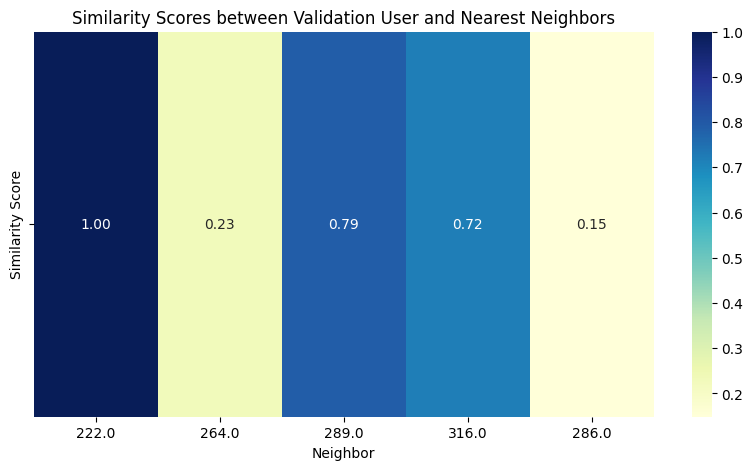

In [144]:
# D Finding Nearest Neighbors in Low-Dimensional Space:
validation_user = validation_proj[0, :]
validation_user_ids = X_validation.index.values

distances = np.zeros((len(validation_proj), 5))
# 1. For each user in the validation set, find the top-k nearest neighbors in the training set.
for i, validation_user in enumerate(validation_proj):
    distance = np.argsort(np.linalg.norm(validation_user - projection, axis=1))
    distances[i] = distance[:5]

# Analyze these pairings and see if the nearest neighbors have similar movie preferences to the validation user.
validation_user_ratings = data.loc[data['userId'] == validation_user_ids[0]]

# Create a dictionary to store the similarity scores
similarity_scores = {}

for neighbor_index in distances[0]:
    neighbor_ratings = data.loc[data['userId'] == neighbor_index]
    
    # Find the movies that both the validation user and the neighbor have rated
    common_movies = pd.merge(validation_user_ratings, neighbor_ratings, on='movieId')

    if not common_movies.empty:
        similarity_score = np.corrcoef(common_movies['rating_x'], common_movies['rating_y'])[0, 1]
        print('Similarity score between validation user and neighbor', neighbor_index, ': ', similarity_score)
        
        # Add the similarity score to the dictionary
        similarity_scores[neighbor_index] = similarity_score
    else:
        print('No common movies between validation user and neighbor', neighbor_index)

# Converting the dictionary to a DataFrame
similarity_scores_df = pd.DataFrame(list(similarity_scores.items()), columns=['Neighbor', 'Similarity Score'])

# Heatmap of the similarity scores
plt.figure(figsize=(10, 5))
sns.heatmap(similarity_scores_df.set_index('Neighbor').T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Similarity Scores between Validation User and Nearest Neighbors')
plt.show()

### Analysis of pairings of similar users

The heatmap above illustrates the similarity between users based on their PCA projections.
<br>

The effectiveness of nearest neighbors in low-dimensional space is context-dependent. While certain pairs exhibit strong correlations, indicating effective similarity capture, the presence of diverse preferences suggests the need for careful consideration of the specific characteristics of the dataset and goals of our recommendation system. 
<br>

Fine-tuning and additional techniques may further improve the performance of similarity detection.



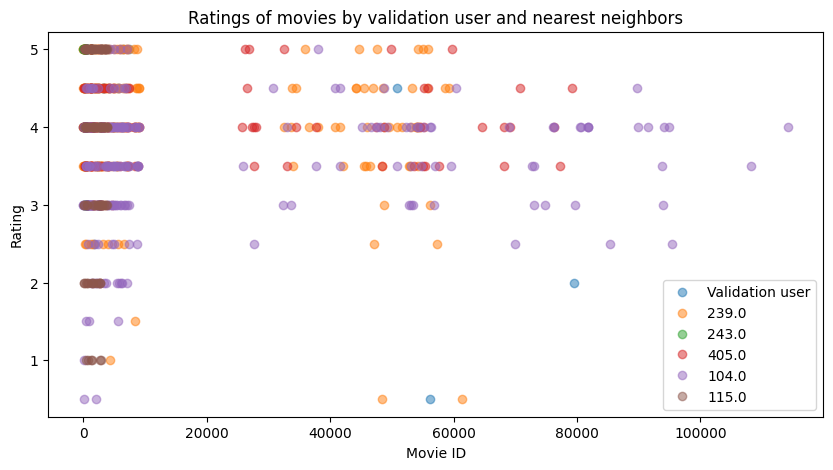

In [70]:
# Plot of the movies and their ratings for the validation user and the nearest neighbors
plt.figure(figsize=(10, 5))
plt.plot(validation_user_ratings['movieId'], validation_user_ratings['rating'], 'o', alpha=0.5)
for neighbor_index in distances[0]:
    neighbor_ratings = data.loc[data['userId'] == neighbor_index]
    plt.plot(neighbor_ratings['movieId'], neighbor_ratings['rating'], 'o', alpha=0.5)
plt.legend(['Validation user'] + list(distances[0]))
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.title('Ratings of movies by validation user and nearest neighbors')
plt.show()


### Brief Analysis of Movie Ratings Plot:

The above plot visualizes the ratings of movies by the validation user and their nearest neighbors. Here are some observations:

1. **Validation User's Ratings:**
   - The blue dots represent the ratings given by the validation user for various movies.
   - The distribution and pattern of these ratings provide insights into the preferences of the validation user.
<br>
2. **Nearest Neighbors' Ratings:**
   - The other dots, distinguished by different colors, represent the ratings given by the nearest neighbors of the validation user.
   - Each color corresponds to a specific neighbor, identified by their index in the distances array.
<br>
3. **Patterns and Trends:**
   - **Common Movies:** Movies with overlapping dots between the validation user and neighbors indicate common preferences. Similarities in the distribution of ratings for these movies suggest shared liking or disliking patterns.
   - **Distinct Preferences:** Variations in the distribution of dots for different neighbors indicate distinct preferences. Some neighbors might consistently rate higher or lower, revealing individual taste differences.
   - **Consistency or Variability:** We can clearly observe the consistency or variability of ratings for specific movies across the validation user and neighbors.


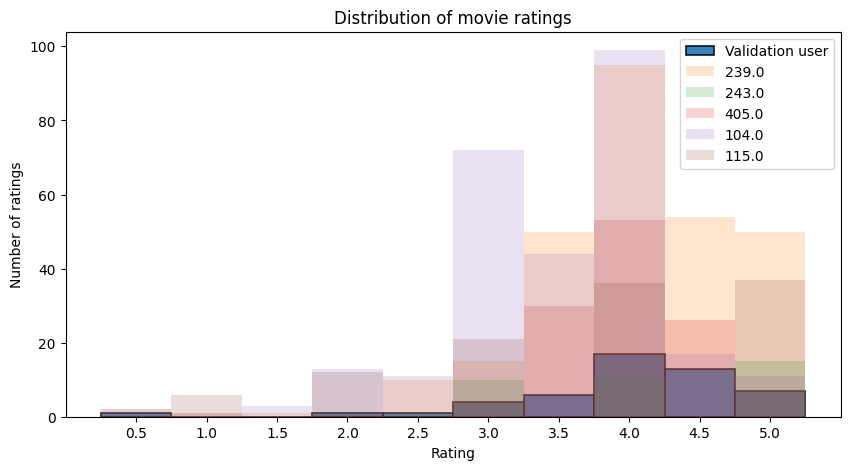

In [71]:
# Plot the distribution of ratings for the validation user and the nearest neighbors
plt.figure(figsize=(10, 5))

# Plot the histogram for the validation user with a higher alpha
plt.hist(validation_user_ratings['rating'], bins=edges, edgecolor='black', linewidth=1.2, alpha=0.9)

# Plot the histograms for the nearest neighbors with a lower alpha
for neighbor_index in distances[0]:
    neighbor_ratings = data.loc[data['userId'] == neighbor_index]
    plt.hist(neighbor_ratings['rating'], bins=edges, linewidth=0.6, alpha=0.2)

plt.legend(['Validation user'] + list(distances[0]))
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.title('Distribution of movie ratings')
plt.show()

### Brief Explanation of Rating Distribution Plot:

The plot illustrates the distribution of movie ratings for the validation user and their nearest neighbors.

- **Validation User Ratings:**
  - The higher alpha for the validation user's histogram emphasizes their individual rating distribution.
  - The central tendency and spread of the validation user's ratings are highlighted.
<br>
- **Nearest Neighbors Ratings:**
  - Lower alpha for neighbors' histograms provides a subtle overlay, indicating the collective rating distribution.
  - Variances and commonalities in neighbors' rating patterns are observable.

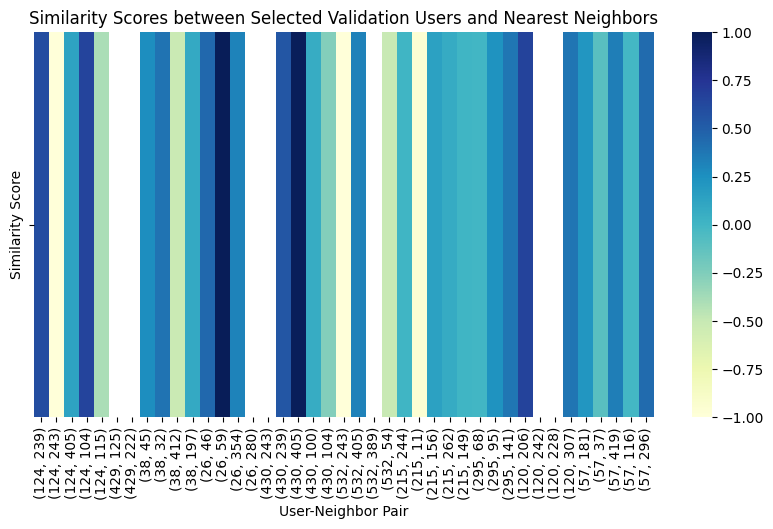

In [74]:
import warnings
warnings.filterwarnings('ignore') # We use this to ignore a warning that we get from seaborn

# Select a subset of the validation users
num_users = 10

selected_validation_user_ids = validation_user_ids[:num_users]
selected_validation_proj = validation_proj[:num_users]

# Calculate the distances for the selected validation users
distances = np.array([np.argsort(np.linalg.norm(validation_user - projection, axis=1))[:5] for validation_user in selected_validation_proj])

# Create a dictionary to store the similarity scores
similarity_scores = {}

for i, validation_user_id in enumerate(selected_validation_user_ids):
    validation_user_ratings = data.loc[data['userId'] == validation_user_id]
    
    for neighbor_index in distances[i]:
        neighbor_ratings = data.loc[data['userId'] == neighbor_index]
        
        # Find the movies that both the validation user and the neighbor have rated
        common_movies = pd.merge(validation_user_ratings, neighbor_ratings, on='movieId')

        if not common_movies.empty:
            similarity_score = np.corrcoef(common_movies['rating_x'], common_movies['rating_y'])[0, 1]
            # Add the similarity score to the dictionary
            similarity_scores[(validation_user_id, neighbor_index)] = similarity_score

# Convert the dictionary to a DataFrame
similarity_scores_df = pd.DataFrame(list(similarity_scores.items()), columns=['User-Neighbor Pair', 'Similarity Score']).set_index('User-Neighbor Pair')

# Heatmap of the similarity scores
plt.figure(figsize=(10, 5))
sns.heatmap(similarity_scores_df.T, cmap='YlGnBu')
plt.title('Similarity Scores between Selected Validation Users and Nearest Neighbors')
plt.show()

The heatmap visualizes similarity scores between selected validation users and their nearest neighbors in the reduced PCA space. Variability in scores across user-neighbor pairs highlights individual differences. This analysis aids in identifying which validation users have more consistent or diverse preferences among their nearest neighbors.

---

### 1. Effectiveness of PCA in capturing user similarity.

PCA (Principal Component Analysis) is effective in capturing user similarity by reducing the dimensionality of the data while retaining the most significant sources of variability. The projection of users into a lower-dimensional space allows for a more compact representation of user preferences. The effectiveness of PCA in capturing user similarity is evident in the similarity scores obtained in the reduced space.

#### Impact of Dimensionality Reduction:
1. **Positive Impact:**
   - **Increased Computational Efficiency:** PCA reduces the number of dimensions, making computations more efficient. In our case the number of dimensions is significantly reduced.
   - **Improved Generalization:** The reduced space often captures essential patterns, promoting generalization in user similarity detection.
<br>
2. **Challenges:**
   - **Information Loss:** Dimensionality reduction inherently involves information loss, as some fine-grained details may not be represented.
   - **Sensitivity to Noise:** The reduced space may be more sensitive to noise, affecting the accuracy of similarity measurements.
<br>
3. **Overall Effect:**
   - **Balancing Act:** While PCA is effective for many applications, the choice of the number of principal components involves a trade-off between information retention and computational efficiency.


### 2. Potential improvements or alternative methods to further refine user similarity detection in reduced spaces.

#### Potential Improvements and Alternatives:
1. **Feature Engineering:**
   - **Domain-Specific Features:** Incorporate domain-specific features that may capture nuanced user preferences not fully represented in the original features.
<br>
2. **Hybrid Methods:**
   - **Combine Techniques:** Utilize a combination of PCA with other dimensionality reduction or feature extraction methods to enhance the representation of user preferences.
<br>
3. **Neighborhood-Based Methods:**
   - **Graph-Based Approaches:** Utilize graph-based methods, like spectral clustering, to identify communities of similar users in the reduced space.
<br>
4. **Deep Learning Models:**
   - **Autoencoders:** Implement autoencoder-based architectures for unsupervised learning, enabling the extraction of complex hierarchical representations.

#### Conclusion:
While PCA serves as a powerful tool for dimensionality reduction, exploring alternative methods and refining the approach can contribute to more accurate and nuanced user similarity detection in reduced spaces.